## R17 ; ggplot2-1

#### ggplot : grammar of graphics
- \+ 기호를 이용하여 일련의 그래프 생성 함수들을 연겨하는 방식으로 생성한다
- 기본적으로 data.frame을 data 인수로 받음
- aes() 함수를 통해 x축 y축에 들어갈 변수를 배치하고, 축 뿐만 아니라 데이터셋에 포함된 각 변수들을 집단,색상,심볼 등으로 대응시켜 시각적으로 표현 가능
- 매핑 후에 geom객체 즉 실제 그래프를 그려주는 함수들을 불러야 그래프가 완성된다
- 추가적으로 labs(),,, 제목 등의 옵션도 추가가능
- ggplot은 집단별로 그래프를 그릴때 확실히 factor처리 해주자 => 제대로 안하면 안그려짐

In [11]:
install.packages('gridExtra')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [32]:
library(ggplot2)
library(gridExtra) 
# 내장 graphics에서는 par(mfrow)이런식으로 window 조절 ggplot2는 사용 불가
# gridExtra 패키지를 통해 각 ggplot을 객체에 담고 grid.arrange(fig1,fig2,,,,ncol=,nrow=) 함수를 통해 window 관리

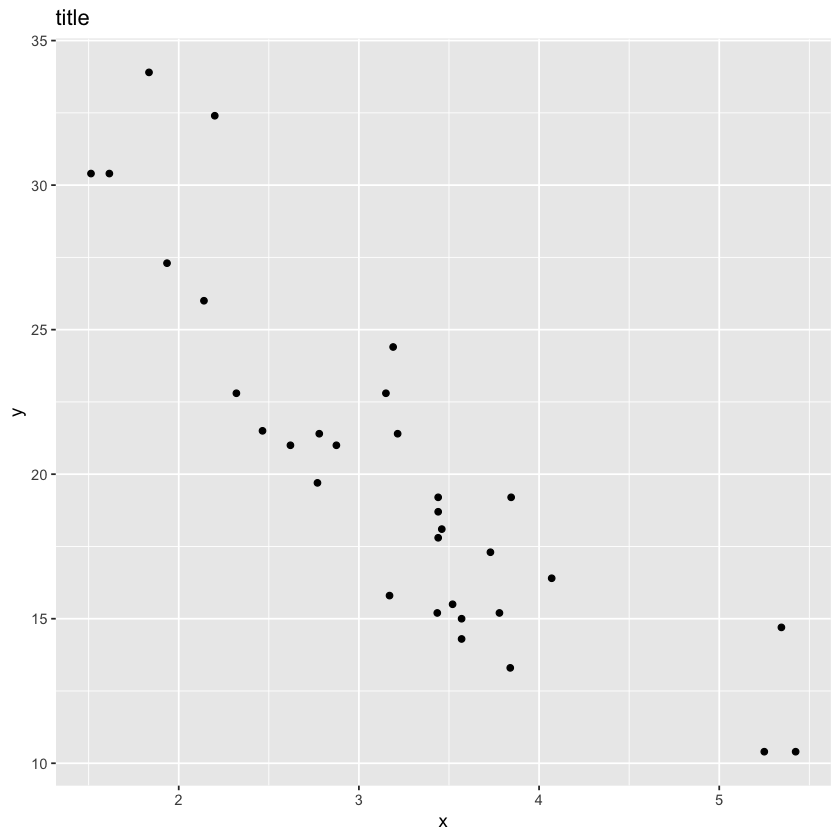

In [3]:
# 먼저 ggplot2 의 간략한 예시를 만들어보고 문법들을 파해쳐보자
ggplot(data=mtcars,aes(x=wt,y=mpg)) +
    geom_point()+
    labs(title = 'title', x = 'x', y = 'y')

## 다양한 geom 객체

Warning message:
“Ignoring unknown parameters: ylim”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


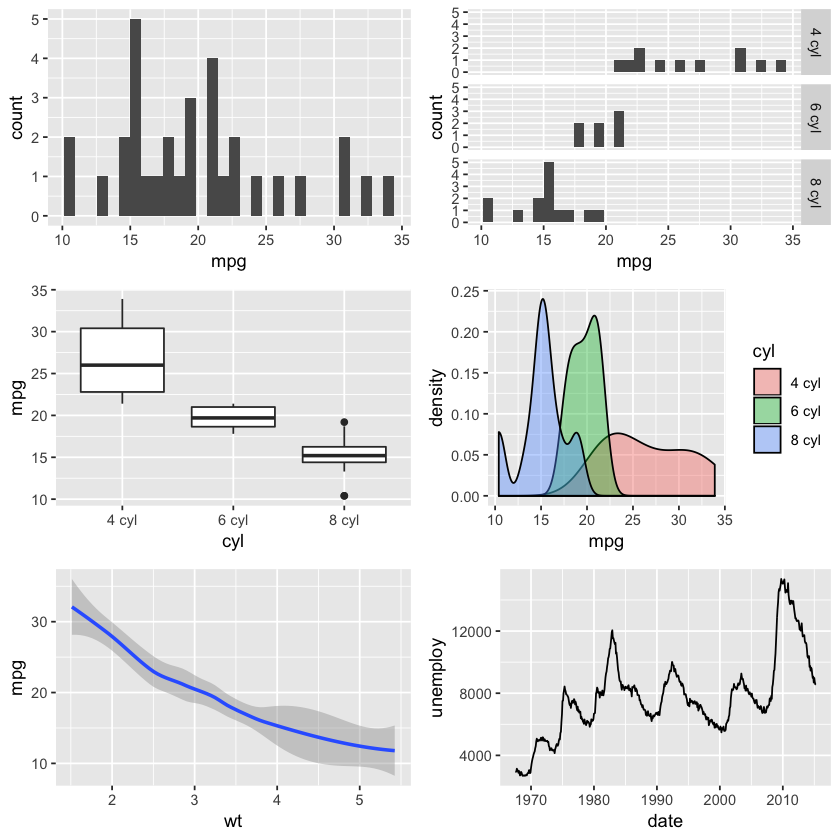

In [31]:
data<-mtcars
data$gear <- factor(data$gear,levels=c(3,4,5),labels=c('3 gear','4 gears','5 gears'))
data$cyl <- factor(data$cyl,levels=c(4,6,8),labels=c('4 cyl','6 cyl','8 cyl'))

fig1<-ggplot(data,aes(x=mpg))+geom_histogram()
fig2<-ggplot(data,aes(x=mpg))+geom_histogram(ylim=c(0,5))+facet_grid(cyl~.)
fig3<-ggplot(data,aes(x=cyl,y=mpg))+geom_boxplot()
fig4<-ggplot(data,aes(x=mpg,fill=cyl))+geom_density(alpha=0.4)
fig5<-ggplot(data,aes(x=wt,y=mpg))+geom_smooth()
fig6<-ggplot(economics,aes(x=date,y=unemploy))+geom_line()
grid.arrange(fig1,fig2,fig3,fig4,fig5,fig6)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


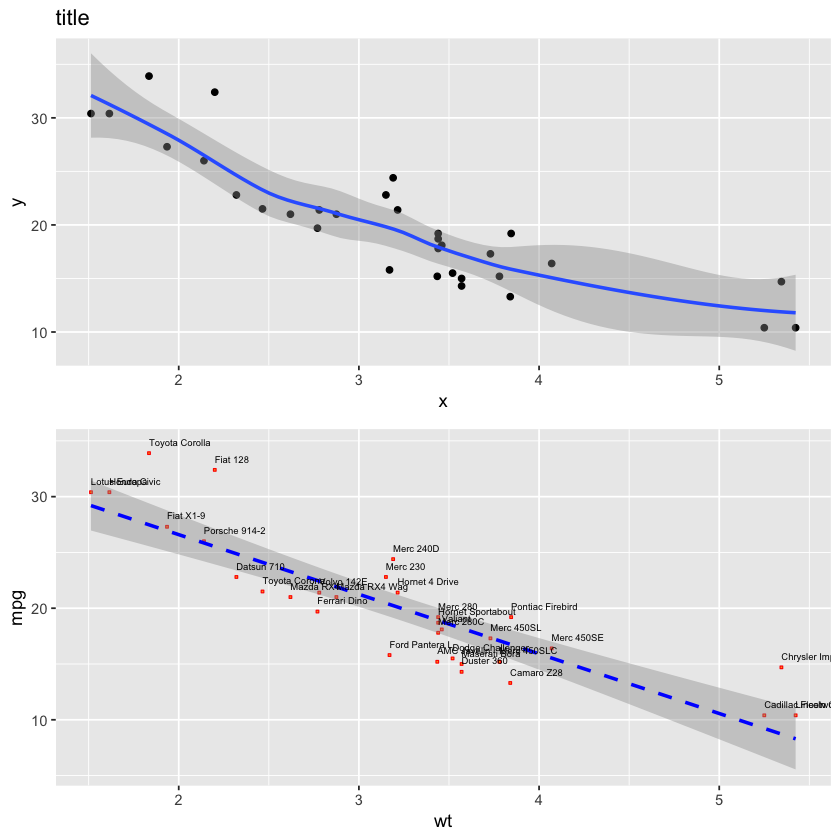

In [49]:
# geom 객체들을 중첩할수 있다
a<-ggplot(data=mtcars,aes(x=wt,y=mpg))+
    geom_point()+
    geom_smooth() +
    labs(title='title',x='x',y='y')

#geom 객체에 다양한 옵션 추가할수 있다
#내장 graphics와 비슷한 옵션들이 존재하나 이름이 조금씩 다를수 있다
b<-ggplot(data=mtcars,aes(x=wt,y=mpg))+
    geom_point(col='red',bg='orange',pch=22,size=0.5)+
    geom_smooth(method = 'lm', color = 'blue', lty = 'dashed')+
    geom_text(label = row.names(mtcars),hjust=0, vjust = 0,nudge_y = 0.7,size=2)
grid.arrange(a,b,nrow=2)


'data.frame':	397 obs. of  6 variables:
 $ rank         : Factor w/ 3 levels "AsstProf","AssocProf",..: 3 3 1 3 3 2 3 3 3 3 ...
 $ discipline   : Factor w/ 2 levels "A","B": 2 2 2 2 2 2 2 2 2 2 ...
 $ yrs.since.phd: int  19 20 4 45 40 6 30 45 21 18 ...
 $ yrs.service  : int  18 16 3 39 41 6 23 45 20 18 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 1 ...
 $ salary       : int  139750 173200 79750 115000 141500 97000 175000 147765 119250 129000 ...


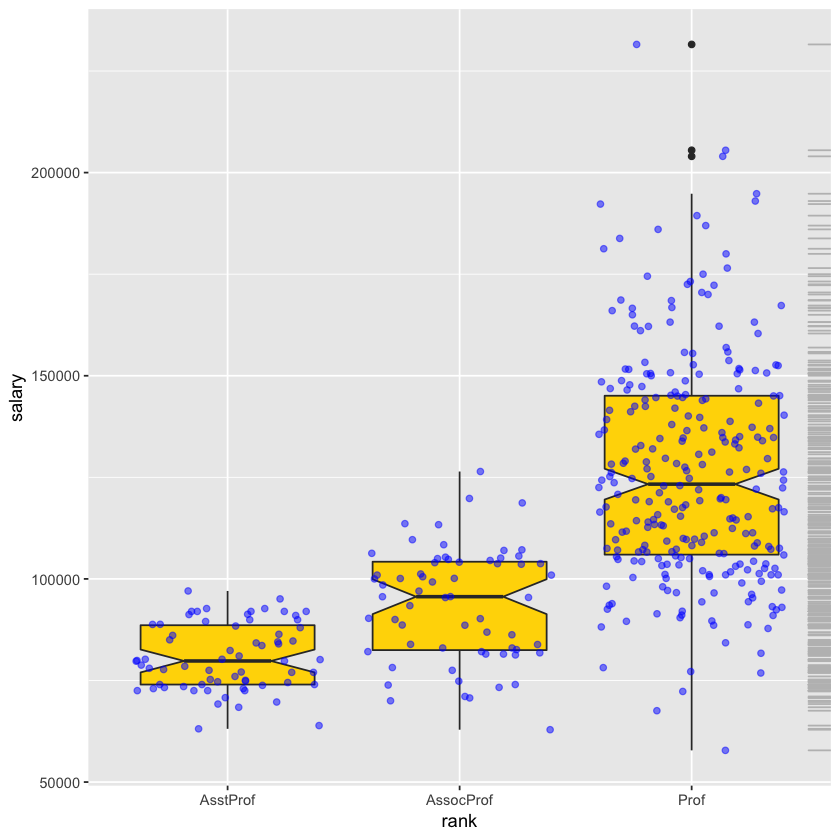

In [59]:
# 좀더 다양한 옵션들을보자
# geom_boxplot geom_point geom_rug
library(car)
str(Salaries)
ggplot(data = Salaries,aes(x=rank,y=salary))+
    geom_boxplot(fill='gold',notch = T)+ # x에 factor들어가있다
    geom_point(position='jitter',color='blue',alpha=0.5)+ # x에 factor들어가있다
    geom_rug(sides='r',color='gray') 


## ggplot의 장점은 내가 원하는대로 geom 함수들을 결합하여 그래프를 그릴수 있다는점이다